In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))    

In [3]:
def error(a,x1,x2,b,y,c):
    e=0
    m=len(y)
    for i in range(m):
        fn= a*x1[i]+b*x2[i]+c
        e+=-y[i]*np.log(sigmoid(fn))-(1-y[i])*np.log(1-sigmoid(fn))
    return (1/m)*e

In [4]:
def step_gradient(a,x1,x2,b,y,learning_rate,c):
    grad_a=0
    grad_b=0
    grad_c=0
    m=len(x1)
    for i in range(m):
        fn= a*x1[i]+b*x2[i]+c
        grad_a += (sigmoid(fn)-y[i])*x1[i]
        grad_b += (sigmoid(fn)-y[i])*x2[i]
        grad_c += (sigmoid(fn)-y[i])
       
      
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
   
    
    return a,b,c

In [5]:
def descend(initial_a,initial_b,initial_c,x1,x2,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
    c=initial_c
   
    for i in range(iterations):
        e=error(a,x1,x2,b,y,c)
        a,b,c=step_gradient(a,x1,x2,b,y,learning_rate,c)
        if i % 1000 == 0:
            print(f"Error: {e},a:{a},b:{b},c:{c}")
    return a,b,c

In [6]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
target = pd.DataFrame(cancer.target, columns=['TARGET'])

In [8]:
data = pd.concat([features, target], axis = 1)
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [10]:
a = data.corr('pearson')

In [13]:
a.loc['TARGET'].sort_values(ascending=False)

TARGET                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [19]:
x1=np.array(data['worst concave points'])
x2=np.array(data['worst perimeter'])
y=np.array(data['TARGET'])
x1=(x1-x1.min())/(x1.max()-x1.min())
x2=(x2-x2.min())/(x2.max()-x2.min())

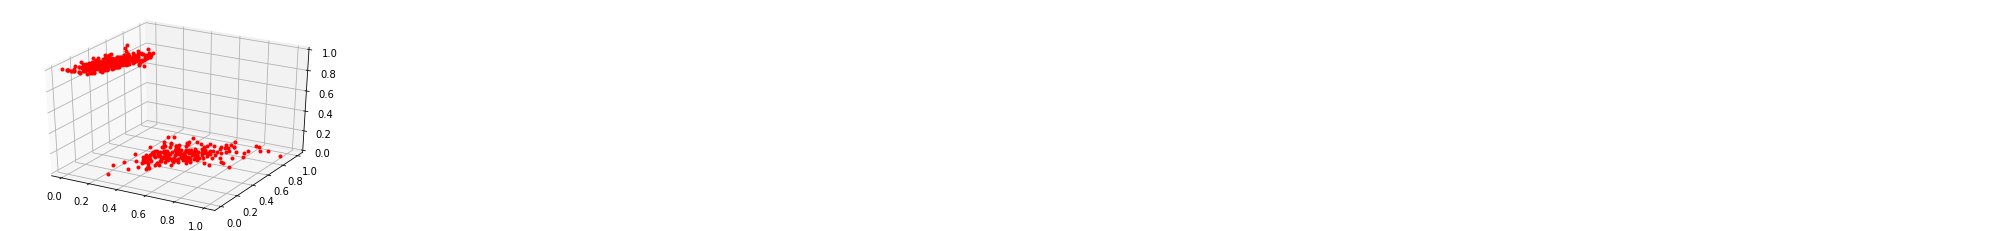

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot(x2,x1,y,'r.')
plt.show()

In [21]:
sep=int(0.9*len(data))

x1_train=x1[:sep]
x2_train=x2[:sep]
y_train=y[:sep]

x1_test=x1[sep:]
x2_test=x2[sep:]
y_test=y[sep:]


print(len(x1_train))
print(len(x2_train))
print(len(y_train))

512
512
512


In [31]:
a,b,c=0,0,0

In [48]:
learning_rate = 0.001
iterations = 10000

In [49]:
final_a,final_b,final_c=descend(a,b,c,x1_train,x2_train,y_train,learning_rate,iterations)

Error: 0.6931471805599468,a:-0.02139281615120276,b:-0.015565939538821657,c:0.058
Error: 0.19290839836182322,a:-8.300710057817481,b:-7.249461006204302,c:6.032351830019715
Error: 0.16864240564144053,a:-9.931001863377277,b:-9.92637401522774,c:7.509445998724803
Error: 0.159101414898326,a:-10.638585686992043,b:-11.824142149158948,c:8.360852827221038
Error: 0.15372627413561063,a:-10.988187517897877,b:-13.331632987240178,c:8.944883182222313
Error: 0.15019244704365012,a:-11.163959529332228,b:-14.589015474339623,c:9.381901415324768
Error: 0.14767170679721517,a:-11.246979435583484,b:-15.666644128754275,c:9.727290872905872
Error: 0.14578430878669174,a:-11.27851786854663,b:-16.60638710828086,c:10.010936549158535
Error: 0.14432603217963147,a:-11.281351512321773,b:-17.435888249607522,c:10.250610343238979
Error: 0.14317444185018532,a:-11.268642030152307,b:-18.17471186534154,c:10.457599982919339


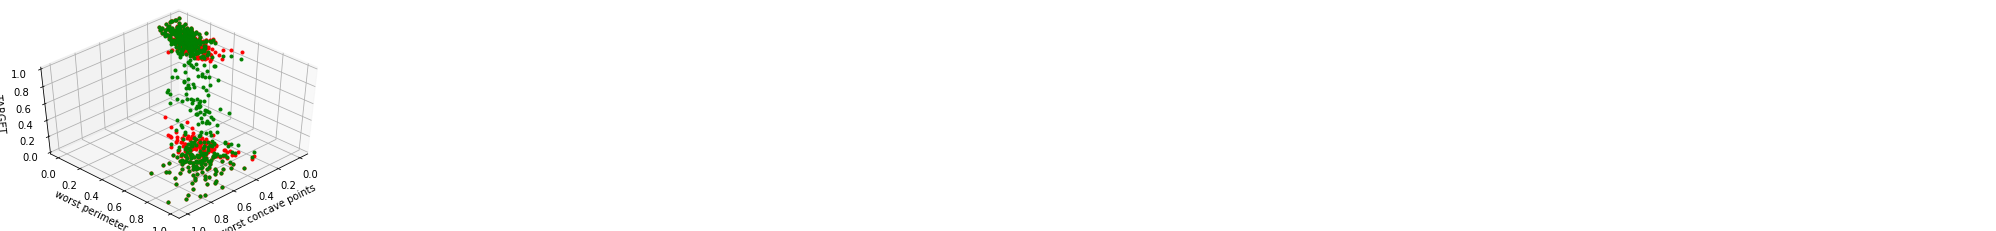

In [50]:
f=(final_a*x1_train)+(final_b*x2_train)+final_c
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.view_init(45,45)

ax.plot3D(x2_train,x1_train,y_train,'r.')
ax.plot3D(x2_train,x1_train, sigmoid(f),'g.')
ax.set_xlabel("worst concave points")
ax.set_ylabel("worst perimeter")
ax.set_zlabel("TARGET")
plt.show()

In [51]:
def accuracy(a,x1,x2,b,y,c):
    correct=0
    for i in range(len(x1)):
        f=a*x1[i]+b*x2[i]+c
        prediction=sigmoid(f)
        if prediction>0.5:
            z=1
        else:
            z=0
        if y[i]==z:
            correct+=1
    print("Accuracy: {}".format(correct/len(y)))

In [52]:
accuracy(final_a,x1_train,x2_train,final_b,y_train,final_c)

Accuracy: 0.9375


In [53]:
accuracy(final_a,x1_test,x2_test,final_b,y_test,final_c)

Accuracy: 0.9649122807017544
